In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

### Read in Data

In [5]:
class Brain:
    def __init__(self):
        '''Initialize brain object'''

    def read_data(self,filepath):
        self.data = pd.read_csv(filepath, delimiter=' ', header = 19, names = ['x', 'y', 'z', 'a', 't', 'r'], index_col = 0)

In [6]:
import os
folder_dir = '../Output-WT-01-17-10-21'
brain_names = os.listdir(folder_dir)
wt_brains = []
for brain in brain_names:
    if ('_AT' not in brain): continue
    print(brain)
    new_brain = Brain()
    new_brain.read_data(folder_dir+'/'+brain)
    wt_brains.append(new_brain)

wildtype_142_AT.psi
wildtype_121_AT.psi
wildtype_133_AT.psi
wildtype_105_AT.psi
wildtype_109_AT.psi
wildtype_117_AT.psi
wildtype_131_AT.psi
wildtype_123_AT.psi
wildtype_140_AT.psi
wildtype_115_AT.psi
wildtype_107_AT.psi
wildtype_119_AT.psi
wildtype_103_AT.psi
wildtype_111_AT.psi
wildtype_127_AT.psi
wildtype_139_AT.psi
wildtype_135_AT.psi
wildtype_113_AT.psi
wildtype_101_AT.psi
wildtype_129_AT.psi
wildtype_137_AT.psi
wildtype_125_AT.psi
wildtype_104_AT.psi
wildtype_116_AT.psi
wildtype_108_AT.psi
wildtype_120_AT.psi
wildtype_143_AT.psi
wildtype_132_AT.psi
wildtype_114_AT.psi
wildtype_118_AT.psi
wildtype_106_AT.psi
wildtype_130_AT.psi
wildtype_141_AT.psi
wildtype_122_AT.psi
wildtype_138_AT.psi
wildtype_126_AT.psi
wildtype_134_AT.psi
wildtype_102_AT.psi
wildtype_110_AT.psi
wildtype_136_AT.psi
wildtype_128_AT.psi
wildtype_124_AT.psi
wildtype_112_AT.psi


### Calculate Bin Variences

In [107]:
import math

bin_num = []
bin_varience = []
sample_varience = []
t_min = -math.pi
t_max = math.pi

for t_bin_num in range (1,15):
    bin_num.append(t_bin_num)
    t_bin_means.append([])
    bins = np.linspace(t_min, t_max, t_bin_num+1)
    bin_variences = []
    pt_nums = []
    r_midians = []
    
    # calculate bin varience
    for brain in wt_brains:
        pt_num = []
        r_midian = []
        
        for bin in range (t_bin_num):
#             print("bin_min: ", bins[bin])
#             print("bin_min: ", bins[bin+1])

            sector = brain.data
            sector = sector[np.logical_and(sector.t>bins[bin], sector.t<bins[bin+1])]
#             print("shape: ", np.shape(sector))
#             print("r median: ", np.median(sector.r))
            pt_num.append(np.median(sector.r))
            r_midian.append(np.median(sector.r))

#             print()
#         print("varience: ", np.var(r_medians))
        pt_nums.append(pt_num)
        r_midians.append(r_midian)
        bin_variences.append(np.var(r_midian))
        
    bin_varience.append(np.mean(bin_variences))
        
    # calculate sample varience
    print(pt_nums[0])
    bin_pt_nums_varience = []
    for i in range (t_bin_num):
        bin_pt_nums = [pt_num[i] for pt_num in r_midians]
        bin_pt_nums_varience.append(np.var(bin_pt_nums))
#         print(np.var(bin_pt_nums))
#     print(np.mean(bin_pt_nums_varience))
#     print()
    sample_varience.append(np.mean(bin_pt_nums_varience))

[4.2509059486879419]
[4.038418627581744, 4.6946627091992985]
[3.7468277821511231, 4.4626990840097758, 5.155697543416041]
[3.4067060223796863, 4.6826419138152175, 3.2085347045166892, 5.4391538828522679]
[3.656036823528074, 4.3213817564825714, 3.4777396248519166, 4.1407275772057677, 5.5147215862012109]
[3.8579502498446701, 3.6429662039986153, 5.2058989611288711, 2.8868385664456921, 5.1657354579984665, 5.1451446630279474]
[4.0174527092775003, 2.819088701052149, 5.091982067093177, 3.1726100171717748, 3.2009733125754822, 5.9597969230138865, 4.6175344093619488]
[4.1602523697042839, 2.5570652460014363, 4.6022914075875105, 5.0865659206752696, 2.8128462967243903, 3.578868631442893, 6.2703737869272693, 4.2918104616494404]
[4.2642790178124068, 2.5437364026935327, 4.0017596818768375, 5.5058627879249027, 2.8981566363509668, 3.03964488606286, 4.1184701575772866, 6.4667108245457126, 4.1092564943620875]
[4.343352486409028, 2.6138536541331909, 3.2635817607419666, 5.1886480133139035, 4.5423163185096476,

In [108]:
print(sample_varience)

[2.0622467699183198, 2.4306013017658872, 3.1328694207497185, 3.4248304463202022, 3.6880000365590306, 4.5076089866458826, 4.3600923094910939, 4.408853601990292, 4.6316759985826401, 4.4183460275594859, 4.7235972640499266, 4.7021926727513224, 4.6871954606082022, 4.8254262992639942]


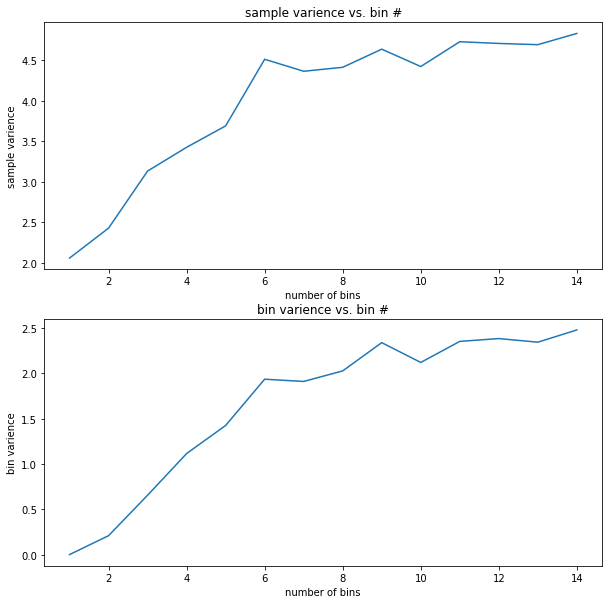

In [115]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(bin_num, sample_varience)
plt.xlabel('number of bins')
plt.ylabel('sample varience')
plt.title('sample varience vs. bin #')

plt.subplot(2, 1, 2)
plt.plot(bin_num, bin_varience)
plt.xlabel('number of bins')
plt.ylabel('bin varience')
plt.title('bin varience vs. bin #')

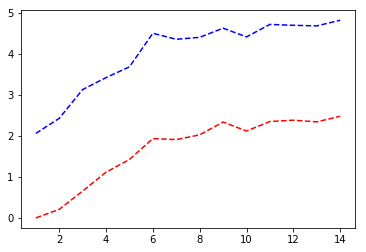

In [112]:
plt.plot(bin_num, bin_varience, 'r--', bin_num, sample_varience, 'b--')